In [4]:
import simexpal
import yaml
import matplotlib.pyplot as plt

cfg = simexpal.config_for_dir()

results = []
for run in cfg.collect_successful_results():
    with run.open_output_file() as f:
        yml = yaml.load(f, Loader=yaml.SafeLoader)
    results.append(yml)

# for r in sorted(results, key=lambda r: (r['threads'], r['algo'])):
#     print('Algorithm {}, {} threads takes: {} ms (insert), {} ms (lookup)'.format(
#           r['algo'], r['threads'], r['time_insert'], r['time_lookup']))

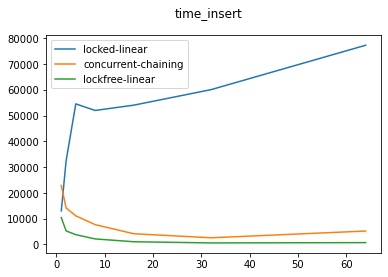

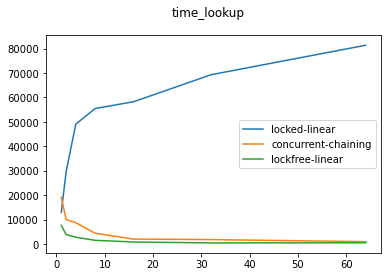

In [5]:
def extract_times(algo, key):
    res = []
    for r in sorted(results, key=lambda r: r['threads']):
        if r['algo'] != algo:
            continue
        res.append((r['threads'], r[key]))
    return res

def plot(key):
    plt.suptitle(key)
    for algo in ['locked-linear', 'concurrent-chaining', 'lockfree-linear']:
        times = extract_times(algo, key)
        plt.plot([t for t, _ in times], [time for _, time in times], label=algo)
    plt.legend()
    plt.show()

plot('time_insert')
plot('time_lookup')

### Solution:
As expexted, the linear implemetation with mutexes performes very bad. Mutexes with chaining are much better, because only a single chain segment is locked during writes. If our input data would not be uniform distributed and many keys map to the same chain, concurrent chaining with mutexes would perform much worse. Lockfree linear is by far the best solution as linear probing is cache friendly and atomic operations don't lock the whole hashtable!